In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import datasets, neighbors, linear_model, preprocessing
from sklearn.model_selection import learning_curve, ShuffleSplit

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Deleting columns that are not helpful for classifying in this example - Cabin, Name, Ticket

In [6]:
data.drop({"Cabin", "Name", "Ticket"}, axis = 1, inplace = True)

In [7]:
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


Need to fix up the 
1. age column because 100+ missing entries. 
2. embarked - 2 missing entries
3. gender and embarked - categorical columns in text. Convert to one hot encoding. 

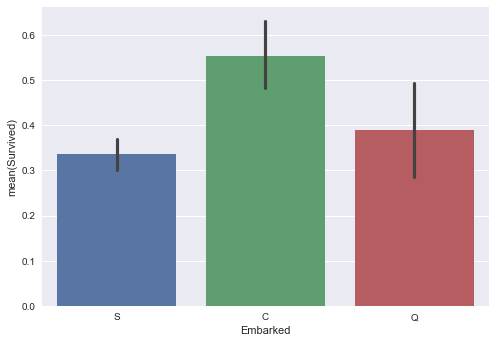

In [8]:
sns.barplot(x = "Embarked", y = "Survived", data = data)
plt.show()

In [9]:
dataclean = data

In [10]:
data.groupby('Survived').Embarked.value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

In [11]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Since the most common embarked value is "S", we will fill this in the missing rows. 

In [12]:
data.fillna(value = {"Embarked" : "S"}, inplace = True).head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


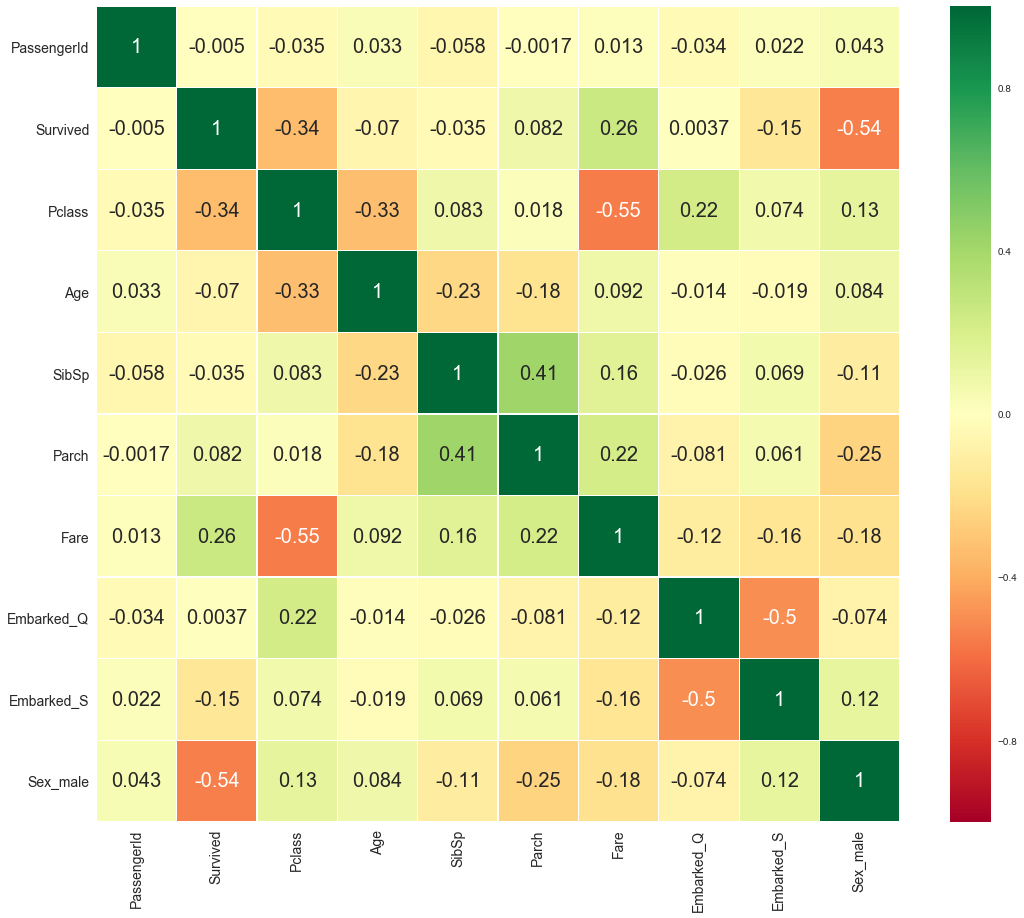

In [100]:
sns.heatmap(dataclean.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [13]:
#pd.get_dummies(data[{"Sex", "Embarked"}])
dataclean = pd.get_dummies(dataclean, columns={"Sex", "Embarked"}, drop_first=True)

In [14]:
dataclean["Age"].describe()
dataclean.fillna(value = {"Age":29.699118}, inplace = True)
print(dataclean.columns)
print(dataclean.info())

Index([u'PassengerId', u'Survived', u'Pclass', u'Age', u'SibSp', u'Parch',
       u'Fare', u'Embarked_Q', u'Embarked_S', u'Sex_male'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Sex_male       891 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.4 KB
None


In [15]:
dataclean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.086420,0.725028,0.647587
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.281141,0.446751,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [16]:
train,test=train_test_split(dataclean,test_size = 0.3, random_state=0,stratify=dataclean['Survived'])

In [17]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test = test.drop("Survived", axis = 1)
y_test = test["Survived"]
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,443.274478,2.290530,29.561329,0.516854,0.365971,33.678424,0.080257,0.733547,0.648475
std,260.820435,0.841464,12.852244,1.075579,0.763473,54.108168,0.271909,0.442459,0.477830
min,2.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,216.000000,1.500000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000
50%,440.000000,3.000000,29.699118,0.000000,0.000000,14.500000,0.000000,1.000000,1.000000
75%,672.500000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,5.000000,512.329200,1.000000,1.000000,1.000000


In [18]:
logistic = LogisticRegression()
fit = logistic.fit(X_train, y_train)
fit.score(X_test, y_test)

0.81343283582089554

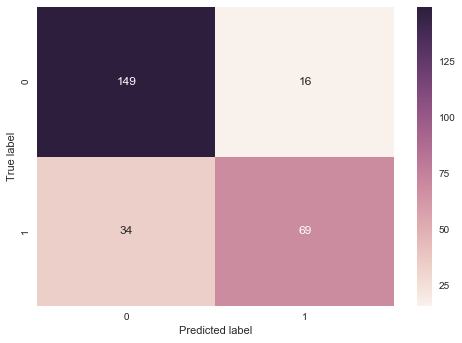

In [19]:
sns.heatmap(confusion_matrix(y_test, logistic.predict(X_test)),annot=True,fmt='2.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, logistic.predict(X_test)).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fscore = 2*precision*recall/(precision+recall)
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.90      0.86       165
          1       0.81      0.67      0.73       103

avg / total       0.81      0.81      0.81       268



C:\Users\Astha\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in long_scalars


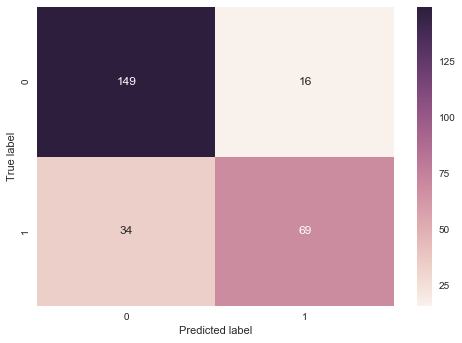

             precision    recall  f1-score   support

          0       0.81      0.90      0.86       165
          1       0.81      0.67      0.73       103

avg / total       0.81      0.81      0.81       268



In [21]:
logistic_reg = LogisticRegression(C = 1)
fit = logistic_reg.fit(X_train, y_train)
fit.score(X_test, y_test)
sns.heatmap(confusion_matrix(y_test, logistic_reg.predict(X_test)),annot=True,fmt='2.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(y_test, logistic_reg.predict(X_test)))

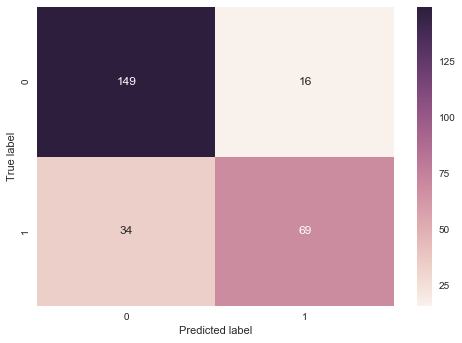

             precision    recall  f1-score   support

          0       0.81      0.90      0.86       165
          1       0.81      0.67      0.73       103

avg / total       0.81      0.81      0.81       268



In [22]:
logistic_reg = LogisticRegression(C = 1)
fit = logistic_reg.fit(X_train, y_train)
fit.score(X_test, y_test)
sns.heatmap(confusion_matrix(y_test, logistic_reg.predict(X_test)),annot=True,fmt='2.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(y_test, logistic_reg.predict(X_test)))

In [23]:
normalized_data=(dataclean-dataclean.min())/(dataclean.max()-dataclean.min())
normalized_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.500000,0.383838,0.654321,0.367921,0.065376,0.063599,0.062858,0.086420,0.725028,0.647587
std,0.289162,0.486592,0.418036,0.163383,0.137843,0.134343,0.096995,0.281141,0.446751,0.477990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.500000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.367921,0.000000,0.000000,0.028213,0.000000,1.000000,1.000000
75%,0.750000,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
train,test=train_test_split(normalized_data,test_size = 0.3, random_state=0,stratify=normalized_data['Survived'])
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test = test.drop("Survived", axis = 1)
y_test = test["Survived"]
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,0.496938,0.645265,0.366189,0.064607,0.060995,0.065736,0.080257,0.733547,0.648475
std,0.293057,0.420732,0.161501,0.134447,0.127246,0.105612,0.271909,0.442459,0.477830
min,0.001124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241573,0.250000,0.271174,0.000000,0.000000,0.015469,0.000000,0.000000,0.000000
50%,0.493258,1.000000,0.367921,0.000000,0.000000,0.028302,0.000000,1.000000,1.000000
75%,0.754494,1.000000,0.434531,0.125000,0.000000,0.060508,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,1.000000,1.000000


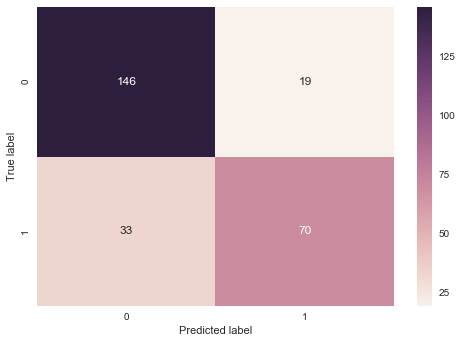

             precision    recall  f1-score   support

        0.0       0.82      0.88      0.85       165
        1.0       0.79      0.68      0.73       103

avg / total       0.80      0.81      0.80       268



In [46]:
logistic_reg = LogisticRegression(C = 100)
fit = logistic_reg.fit(X_train, y_train)
fit.score(X_test, y_test)
sns.heatmap(confusion_matrix(y_test, logistic_reg.predict(X_test)),annot=True,fmt='2.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(y_test, logistic_reg.predict(X_test)))

In [95]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0.000000,1.0,0.271174,0.125,0.0,0.014151,0.0,1.0,1.0
1,0.001124,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0
2,0.002247,1.0,0.321438,0.000,0.0,0.015469,0.0,1.0,0.0
3,0.003371,0.0,0.434531,0.125,0.0,0.103644,0.0,1.0,0.0
4,0.004494,1.0,0.434531,0.000,0.0,0.015713,0.0,1.0,1.0


In [91]:
X = normalized_data.drop("Survived", axis=1)
y = normalized_data["Survived"]
train_sizes, train_scores, test_scores = learning_curve(logistic_reg, X, y, cv=None, n_jobs=1, train_sizes=[ 0.1, 0.33, 0.55, 0.78, 1.])

In [33]:
test_scores

array([[ 0.78787879,  0.80808081,  0.78114478],
       [ 0.8047138 ,  0.8013468 ,  0.77777778],
       [ 0.78787879,  0.78451178,  0.77777778],
       [ 0.77104377,  0.79124579,  0.79461279],
       [ 0.78451178,  0.79461279,  0.77777778]])

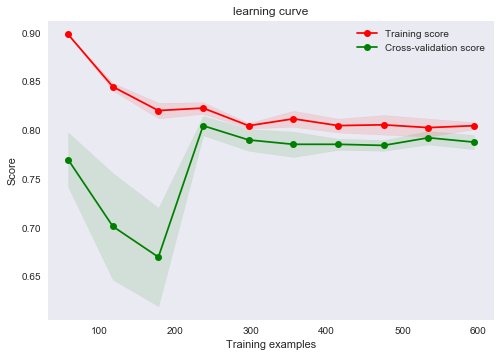

In [48]:
plot = plot_learning_curve(logistic_reg, "learning curve", X, y, train_sizes=np.linspace(.1, 1.0, 10))
plt.show()

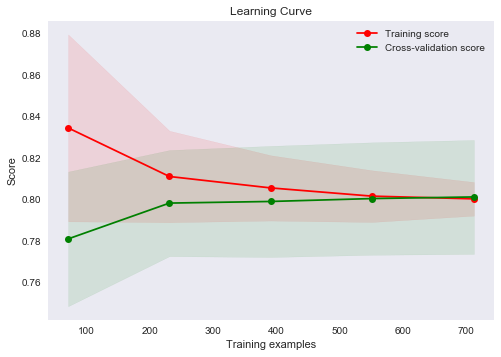

In [56]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
title = "Learning Curve"
estimator = LogisticRegression(C = 100)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xnew = pca.fit_transform(X)

In [76]:
xnew[:,1].shape

(891L,)

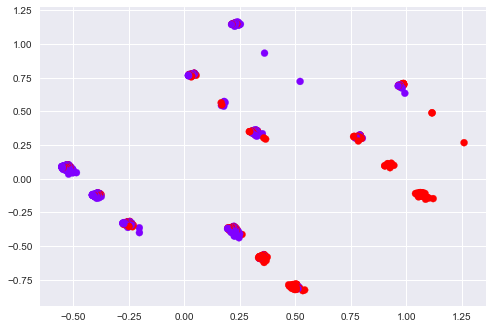

In [82]:
plt.scatter(xnew[:,0], xnew[:,1], c = 0.5*y, cmap = 'rainbow')
plt.show()

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
xnew2 = lda.fit_transform(X, y)
plt.scatter(xnew2[:,0], xnew2[:,1], c = y, cmap = 'rainbow')
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

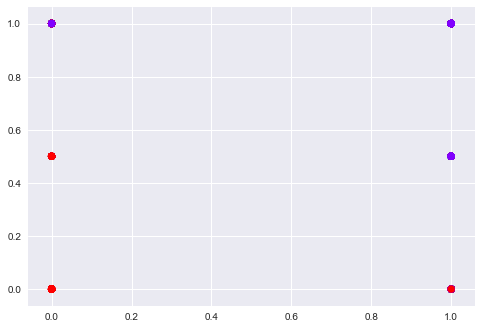

In [96]:
plt.scatter(X["Sex_male"], X["Pclass"], c = y, cmap = 'rainbow')
plt.show()